# UNLP Machine Learning - TP2
---------------------------------------
* **Autores:** 
    - Emiliano Bohorquez
    - Brayan A. Condori Luque
    - Milagros Onofri
* **Objetivo:** Este notebook analiza los datos de forma descriptiva y predictiva.
---------------------------------------

**Fecha de Creación:** 2024-12-14

**Fecha de Actualización:** 2024-12-14

In [1]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import cross_val_score, LeaveOneOut, KFold
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Definimos las rutas de los archivos
TEST_FINAL = "../stores/test_set_final.csv"
TRAIN_FINAL = "../stores/train_set_final.csv"

In [3]:
train_set = pd.read_csv(TRAIN_FINAL, sep=",")
train_set = train_set.drop(columns=["Unnamed: 0"])
train_set.columns.values

array(['id', 'Ingtot', 'Ingtotob', 'Mujer', 'Varon', 'anios_educ_head',
       'edad_head', 'hs_work_head', 'infancia', 'ing_capital',
       'oficio_Administración y Gestión_head',
       'oficio_Agricultura, Pesca y Explotación de Recursos Naturales_head',
       'oficio_Arte, Cultura y Medios_head',
       'oficio_Ciencias Biológicas y de la Salud_head',
       'oficio_Ciencias Sociales y Humanidades_head',
       'oficio_Ciencias, Ingeniería y Tecnología_head',
       'oficio_Industria, Manufactura y Construcción_head',
       'oficio_Oficios Administrativos y Comerciales_head',
       'oficio_Otros Oficios y Trabajos No Clasificados_head',
       'oficio_Servicios Personales y Comunitarios_head',
       'oficio_Sin Categoría_head', 'oficio_Transporte y Logística_head',
       'subsidio', 'subsidio_head', 'Clase', 'P5000', 'P5010', 'P5100',
       'P5130', 'P5140', 'Nper', 'Npersug', 'Ingtotug', 'Ingtotugarr',
       'Ingpcug', 'Li', 'Lp', 'Pobre', 'Indigente', 'Npobres',
       'N

In [4]:
train_set.columns

Index(['id', 'Ingtot', 'Ingtotob', 'Mujer', 'Varon', 'anios_educ_head',
       'edad_head', 'hs_work_head', 'infancia', 'ing_capital',
       'oficio_Administración y Gestión_head',
       'oficio_Agricultura, Pesca y Explotación de Recursos Naturales_head',
       'oficio_Arte, Cultura y Medios_head',
       'oficio_Ciencias Biológicas y de la Salud_head',
       'oficio_Ciencias Sociales y Humanidades_head',
       'oficio_Ciencias, Ingeniería y Tecnología_head',
       'oficio_Industria, Manufactura y Construcción_head',
       'oficio_Oficios Administrativos y Comerciales_head',
       'oficio_Otros Oficios y Trabajos No Clasificados_head',
       'oficio_Servicios Personales y Comunitarios_head',
       'oficio_Sin Categoría_head', 'oficio_Transporte y Logística_head',
       'subsidio', 'subsidio_head', 'Clase', 'P5000', 'P5010', 'P5100',
       'P5130', 'P5140', 'Nper', 'Npersug', 'Ingtotug', 'Ingtotugarr',
       'Ingpcug', 'Li', 'Lp', 'Pobre', 'Indigente', 'Npobres', 'Nindigen

In [5]:
# La función summarize busca replicar el comando del mismo nombre que se utiliza en STATA.

def summarize(df, x, ponder):
    """
    Función que devuelve una tabla de estadísticas principales con ponderadores
    
    """
    mean_w = np.average(df[x], weights = df[ponder]) # Obtención de la media ponderada
    std_w = np.sqrt(
    np.average(
        (df[x] - np.average(df[x], weights=df[ponder]))**2,
        weights=df[ponder]
    ) * (len(df[x]) / (len(df[x]) - 1)) # Cálculo manual del desvío estandar ajustandolo por N-1 grados de libertad
)

    total_obs = df[ponder].sum() # Total de observaciones en función de la sumatoria de la columna del ponderador
    minimo = df[x].min() # El valor mínimo del conjunto de datos
    maximo = df[x].max() # El valor máximo del conjunto de datos
    return mean_w, std_w, total_obs, minimo, maximo

In [6]:
train_set["ponder"] = 1

In [7]:
train_set.dtypes


id                                                                     object
Ingtot                                                                float64
Ingtotob                                                              float64
Mujer                                                                   int64
Varon                                                                   int64
anios_educ_head                                                       float64
edad_head                                                               int64
hs_work_head                                                          float64
infancia                                                                int64
ing_capital                                                             int64
oficio_Administración y Gestión_head                                    int64
oficio_Agricultura, Pesca y Explotación de Recursos Naturales_head      int64
oficio_Arte, Cultura y Medios_head                              

In [8]:
numeric_columns = train_set.select_dtypes(include=[np.number]).columns
summary_stats = {col: summarize(train_set, col, "ponder") for col in numeric_columns}

Variable: gen_relativo
Media: 0.53
Desvío Estándar: 0.28
Total de Observaciones: 164960
Mínimo: 0.00
Máximo: 1.00


Variable: anios_educ_head
Media: 6.10
Desvío Estándar: 3.58
Total de Observaciones: 164939
Mínimo: 0.00
Máximo: 15.00


Variable: hacinamiento
Media: 0.69
Desvío Estándar: 0.27
Total de Observaciones: 164960
Mínimo: 0.06
Máximo: 5.00


Variable: subsidio
Media: 0.12
Desvío Estándar: 0.22
Total de Observaciones: 164960
Mínimo: 0.00
Máximo: 1.00


Variable: P5140
Media: 437911.80
Desvío Estándar: 1447543.24
Total de Observaciones: 64453
Mínimo: 20.00
Máximo: 300000000.00


Variable: Nper
Media: 3.29
Desvío Estándar: 1.77
Total de Observaciones: 164960
Mínimo: 1.00
Máximo: 28.00


Variable: mayoria_infancia
Media: 0.19
Desvío Estándar: 0.22
Total de Observaciones: 164960
Mínimo: 0.00
Máximo: 1.00




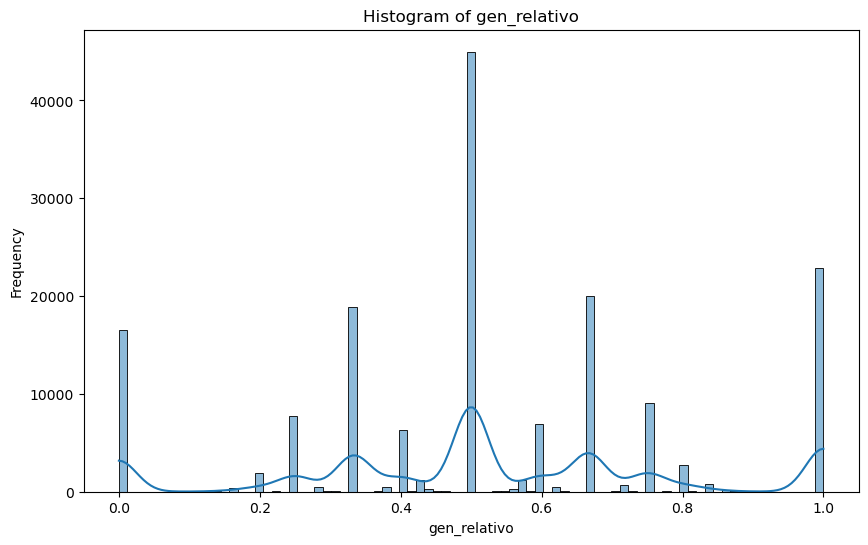

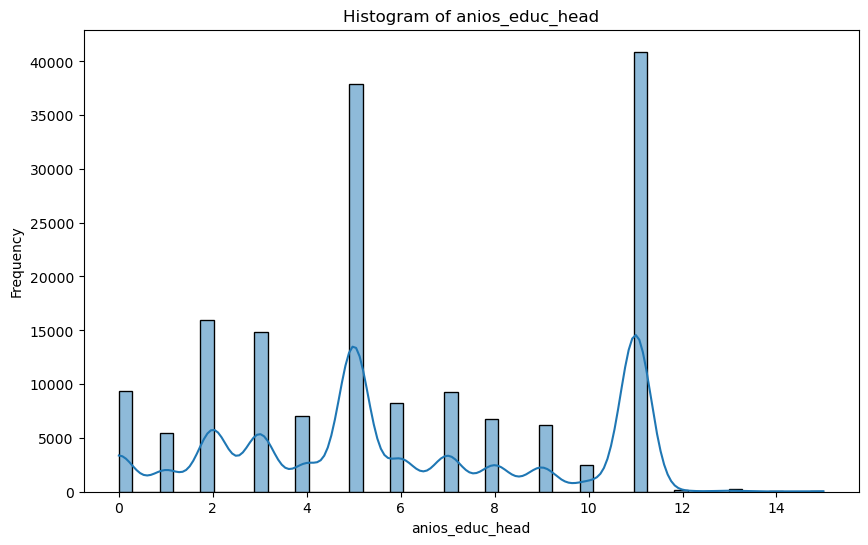

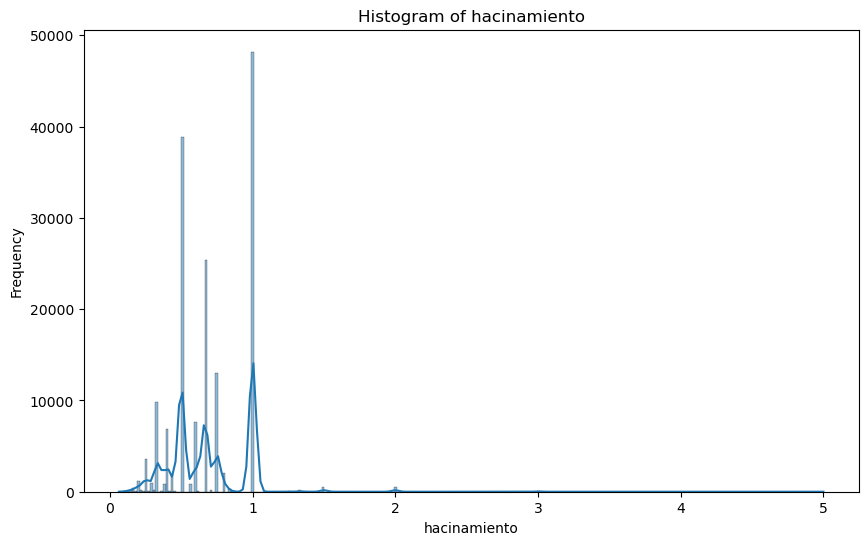

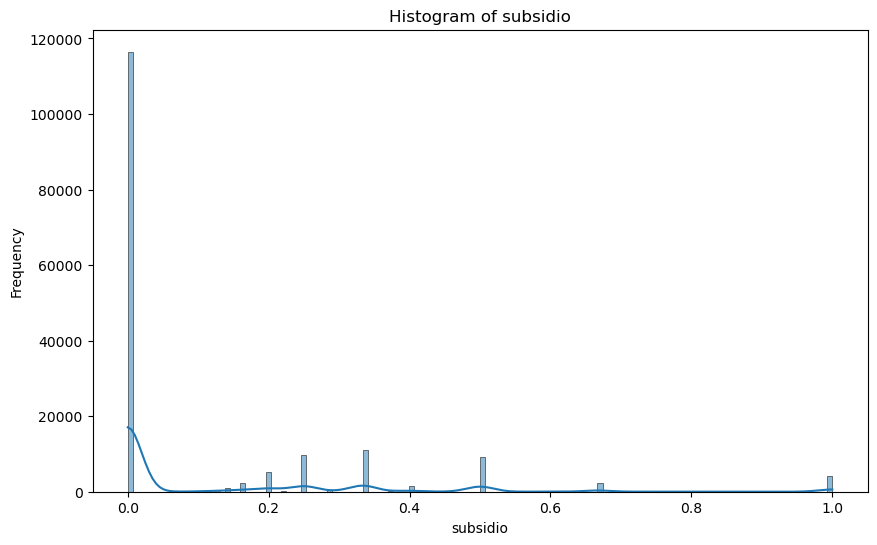

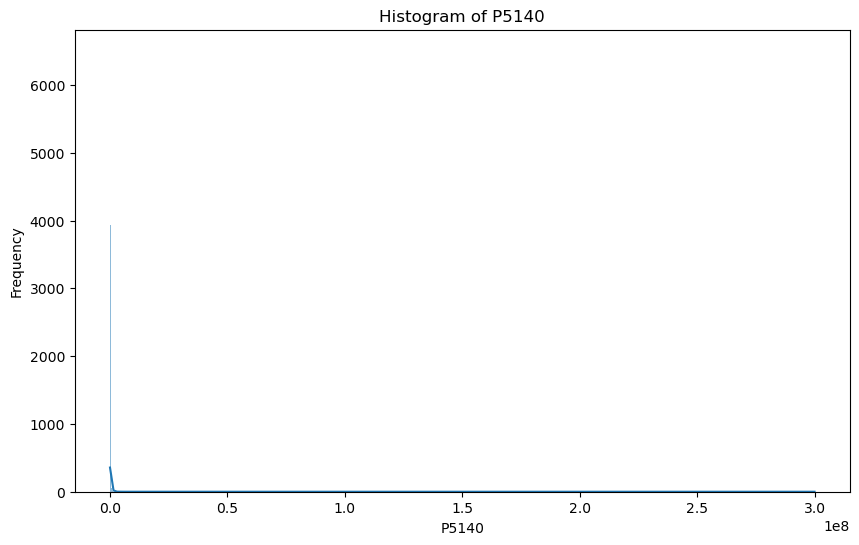

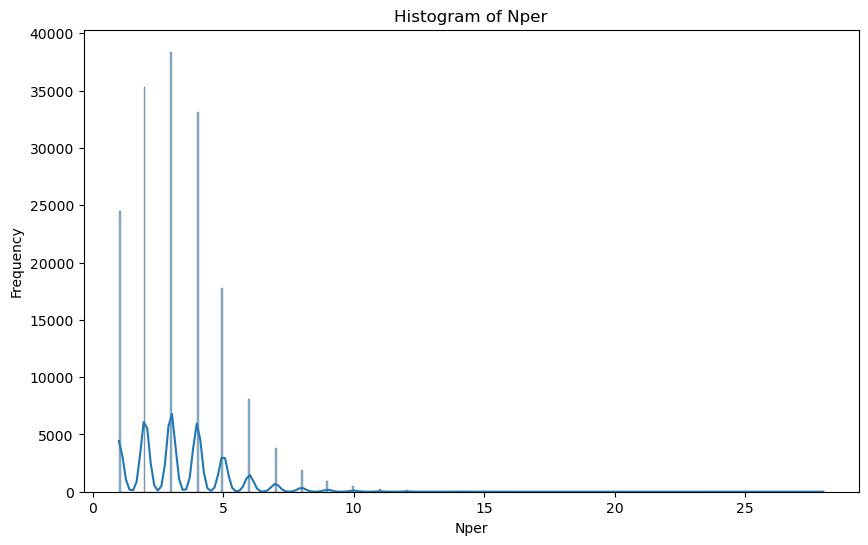

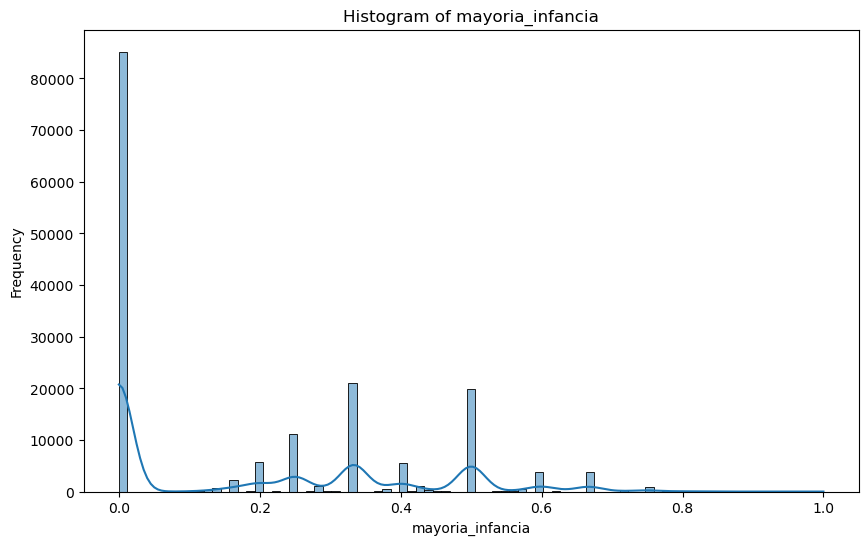

In [9]:
# continuas = [
    # 'Ingtot', 'Ingtotob', 'Ingtotug', 'Ingtotugarr', 'Ingpcug',
    #   'Mujer', 'Varon', 'anios_educ_head', 'hs_work_head', 'infancia',
        # 'subsidio', 'P5130', 'P5140', 'Nper', 'Npersug', 'Li', 'Lp', 'Nindigentes',
        #   'Npobres', 'mayoria_infancia', 'hacinamiento', 'Ingtot_log', 'Ingtotob_log', 'Ingtotug_log', 'Ingtotugarr_log',
    #    'Ingpcug_log', 'P5130_log']


continuas = [
     'gen_relativo', 'anios_educ_head', 'hacinamiento',
    'subsidio', 'P5140', 'Nper', 'mayoria_infancia']

for var in continuas:
    if var in train_set.columns:  # Ensure the variable exists in the DataFrame
        filtered_data = train_set[var].dropna()  # Drop NaN values for this variable
        if not filtered_data.empty:  # Check if there are remaining observations
            print(f"Variable: {var}")
            print(f"Media: {filtered_data.mean():.2f}")  # Calculate mean
            print(f"Desvío Estándar: {filtered_data.std():.2f}")  # Calculate standard deviation
            print(f"Total de Observaciones: {filtered_data.shape[0]}")  # Count non-NaN observations
            print(f"Mínimo: {filtered_data.min():.2f}")  # Calculate minimum
            print(f"Máximo: {filtered_data.max():.2f}")  # Calculate maximum
            print("\n")
        else:
            print(f"Variable: {var} has no valid observations.\n")

# Create histograms for continuous variables

for var in continuas:
    if var in train_set.columns:
        filtered_data = train_set[var].dropna()
        if not filtered_data.empty:
            plt.figure(figsize=(10, 6))
            sns.histplot(filtered_data, kde=True)
            plt.title(f"Histogram of {var}")
            plt.xlabel(var)
            plt.ylabel("Frequency")
            plt.show()
            

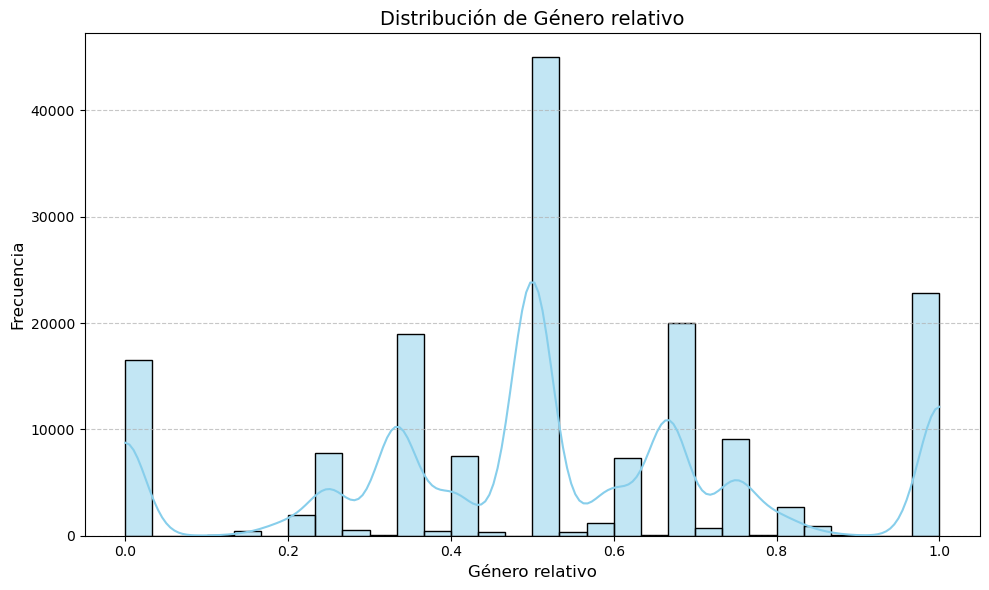

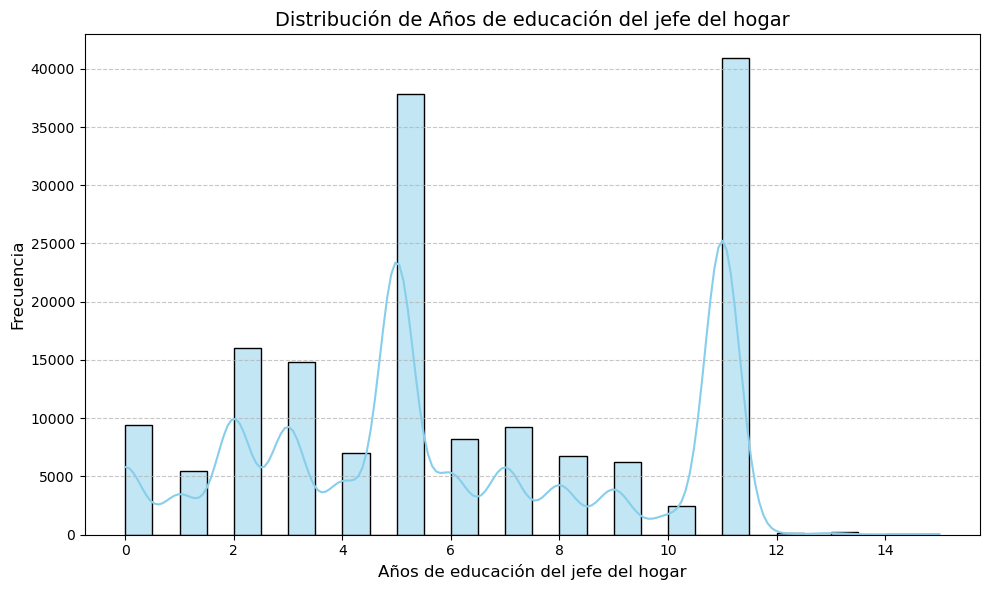

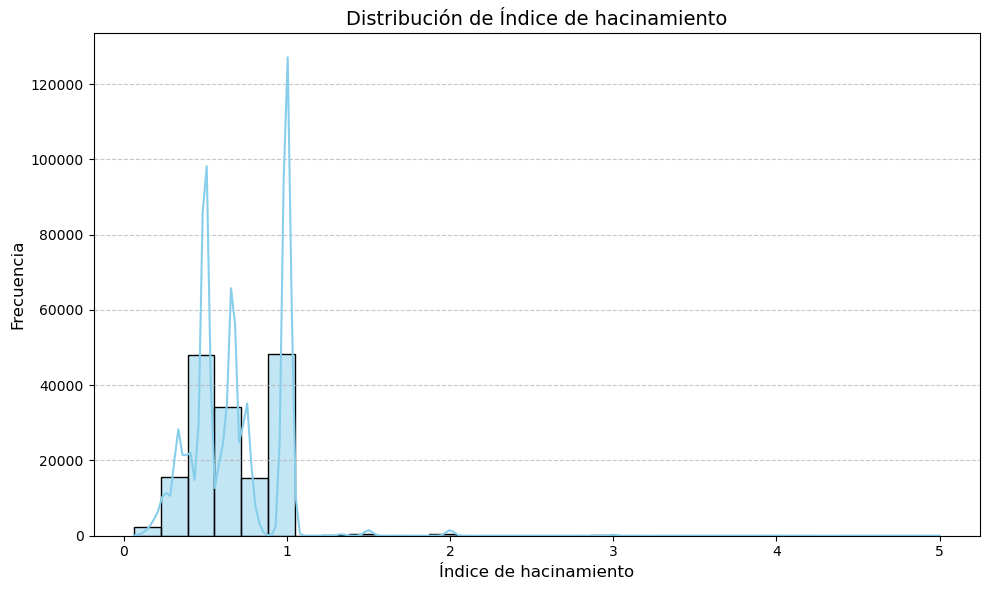

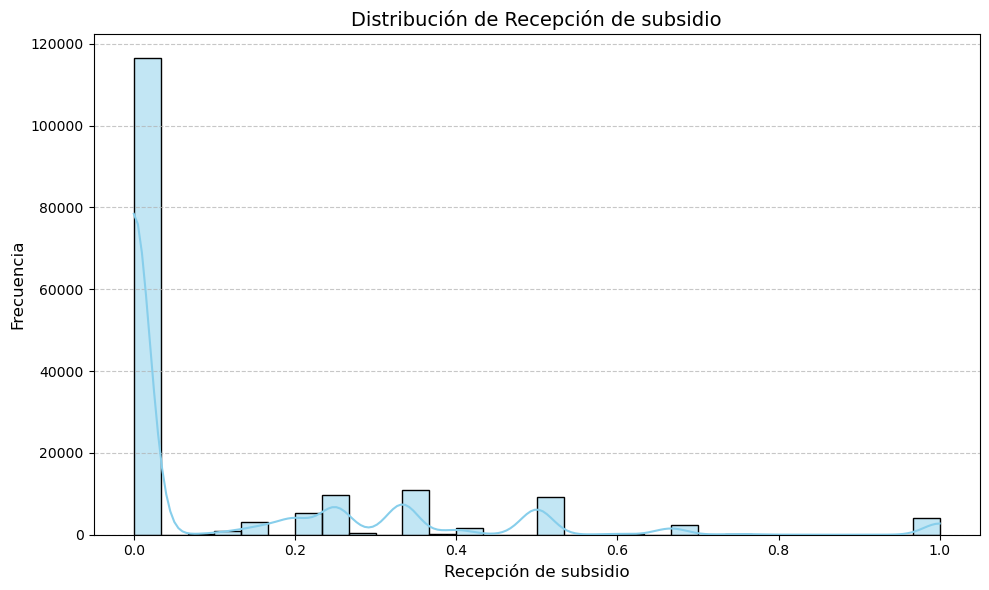

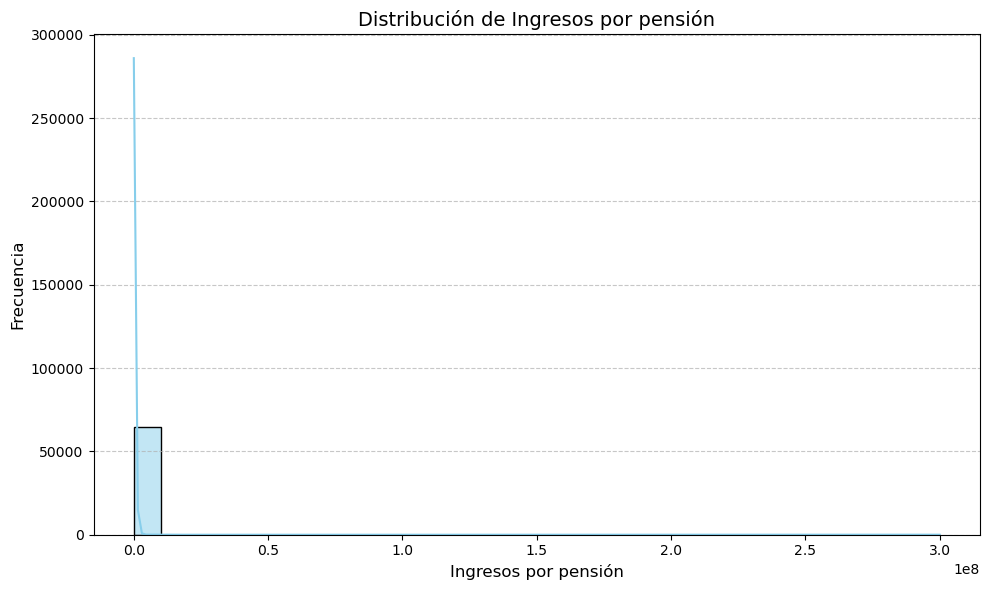

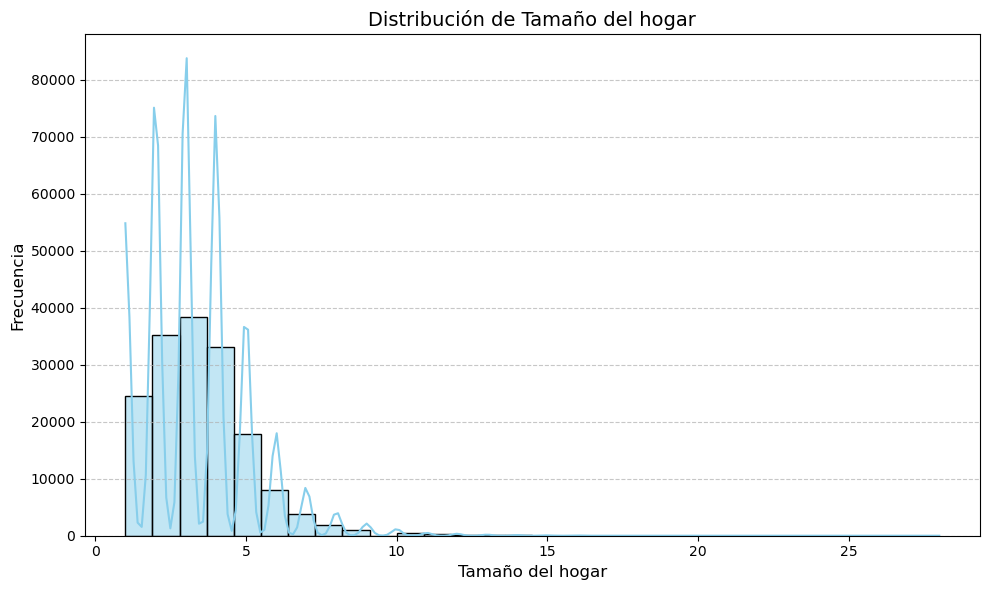

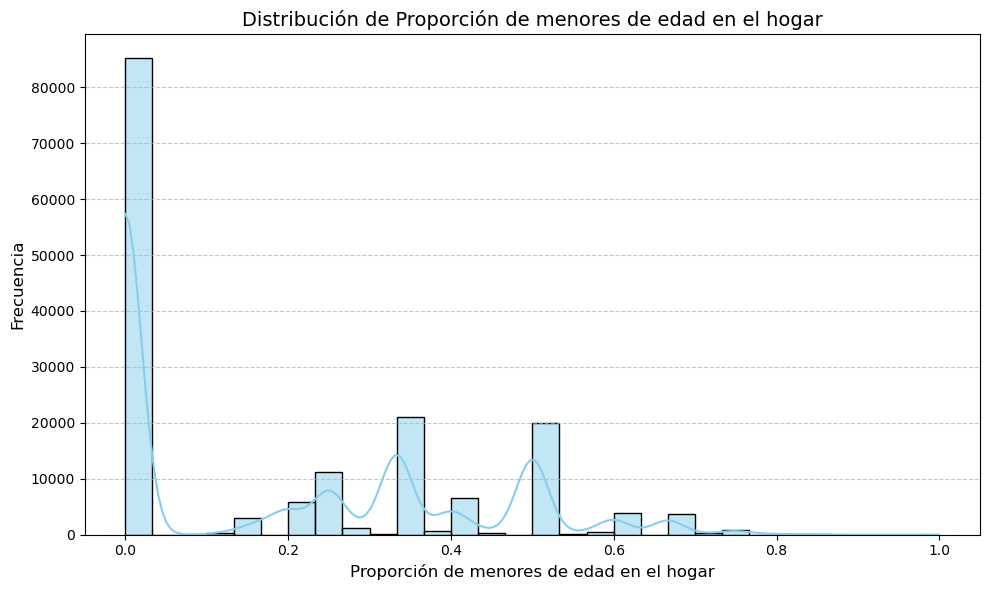

In [10]:

continuas = [
     'gen_relativo', 'anios_educ_head', 'hacinamiento',
    'subsidio', 'P5140', 'Nper', 'mayoria_infancia']
# Crear un diccionario con nombres más descriptivos para las variables
nombres_prolijos = {
    'gen_relativo': 'Género relativo',
    'anios_educ_head': 'Años de educación del jefe del hogar',
    'hacinamiento': 'Índice de hacinamiento',
    'subsidio': 'Recepción de subsidio',
    'P5140': 'Ingresos por pensión',
    'Nper': 'Tamaño del hogar',
    'mayoria_infancia': 'Proporción de menores de edad en el hogar'
}

# Crear histogramas con etiquetas mejoradas
for var in continuas:
    if var in train_set.columns:
        filtered_data = train_set[var].dropna()
        if not filtered_data.empty:
            # Configuración del gráfico
            plt.figure(figsize=(10, 6))
            sns.histplot(filtered_data, kde=True, color='skyblue', bins=30)
            
            # Títulos y etiquetas
            nombre_descriptivo = nombres_prolijos.get(var, var)  # Obtener nombre prolijo o usar el nombre técnico como respaldo
            plt.title(f"Distribución de {nombre_descriptivo}", fontsize=14)
            plt.xlabel(nombre_descriptivo, fontsize=12)
            plt.ylabel("Frecuencia", fontsize=12)
            
            # Ajustes de estilo
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()


In [11]:
# Subset of the dataset with dummy variables
dummies = [
    'ing_capital',
    'Pobre', 'P5090_Tomada'
]


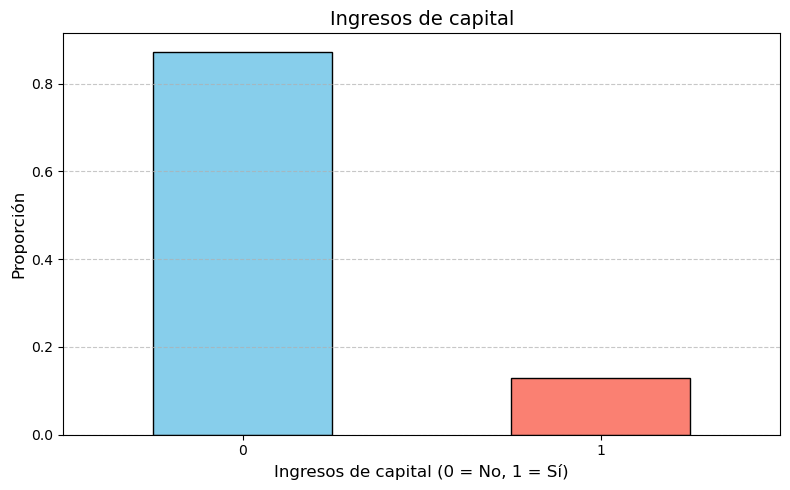

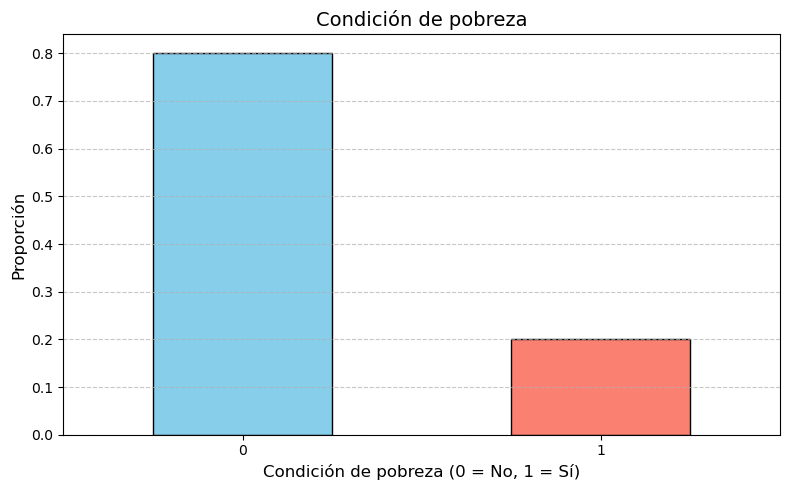

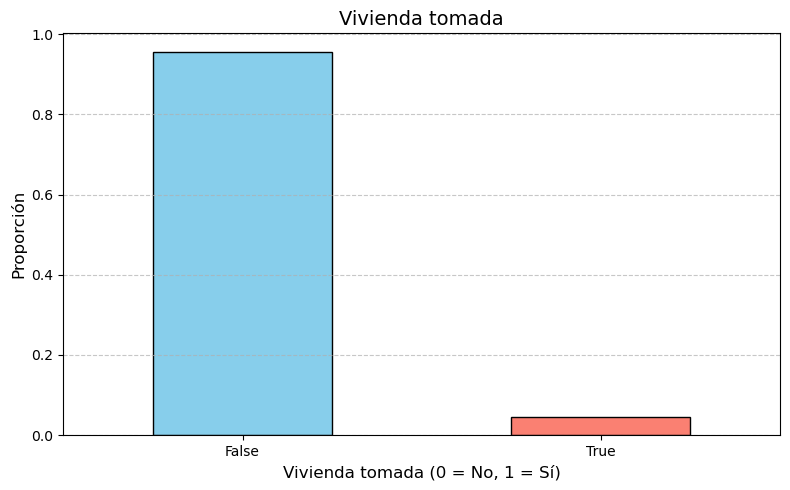

In [13]:
# Crear un diccionario con nombres más descriptivos para las variables dummies
dummies = {
    'ing_capital': 'Ingresos de capital',
    'Pobre': 'Condición de pobreza',
    'P5090_Tomada': 'Vivienda tomada'
}

# Gráficos de barras con etiquetas mejoradas
for var in dummies:
    if var in train_set.columns:
        proportions = train_set[var].value_counts(normalize=True)
        
        # Configuración del gráfico
        plt.figure(figsize=(8, 5))
        proportions.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
        
        # Etiquetas descriptivas
        nombre_descriptivo = dummies.get(var, var)  # Usar nombre prolijo si está disponible
        plt.title(f"{nombre_descriptivo}", fontsize=14)
        plt.xlabel(f"{nombre_descriptivo} (0 = No, 1 = Sí)", fontsize=12)
        plt.ylabel("Proporción", fontsize=12)
        
        # Ajustes de estilo
        plt.xticks(rotation=0, fontsize=10)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()



In [ ]:
dummy_columns_head = [col for col in train_set.columns if col.startswith('oficio_') and col.endswith('_head')]
dummy_columns_head = [col for col in dummy_columns_head if col != 'oficio_Sin Categoría_head']
dominio_dummies = pd.get_dummies(train_set['Dominio'], prefix='Dominio', drop_first=True)

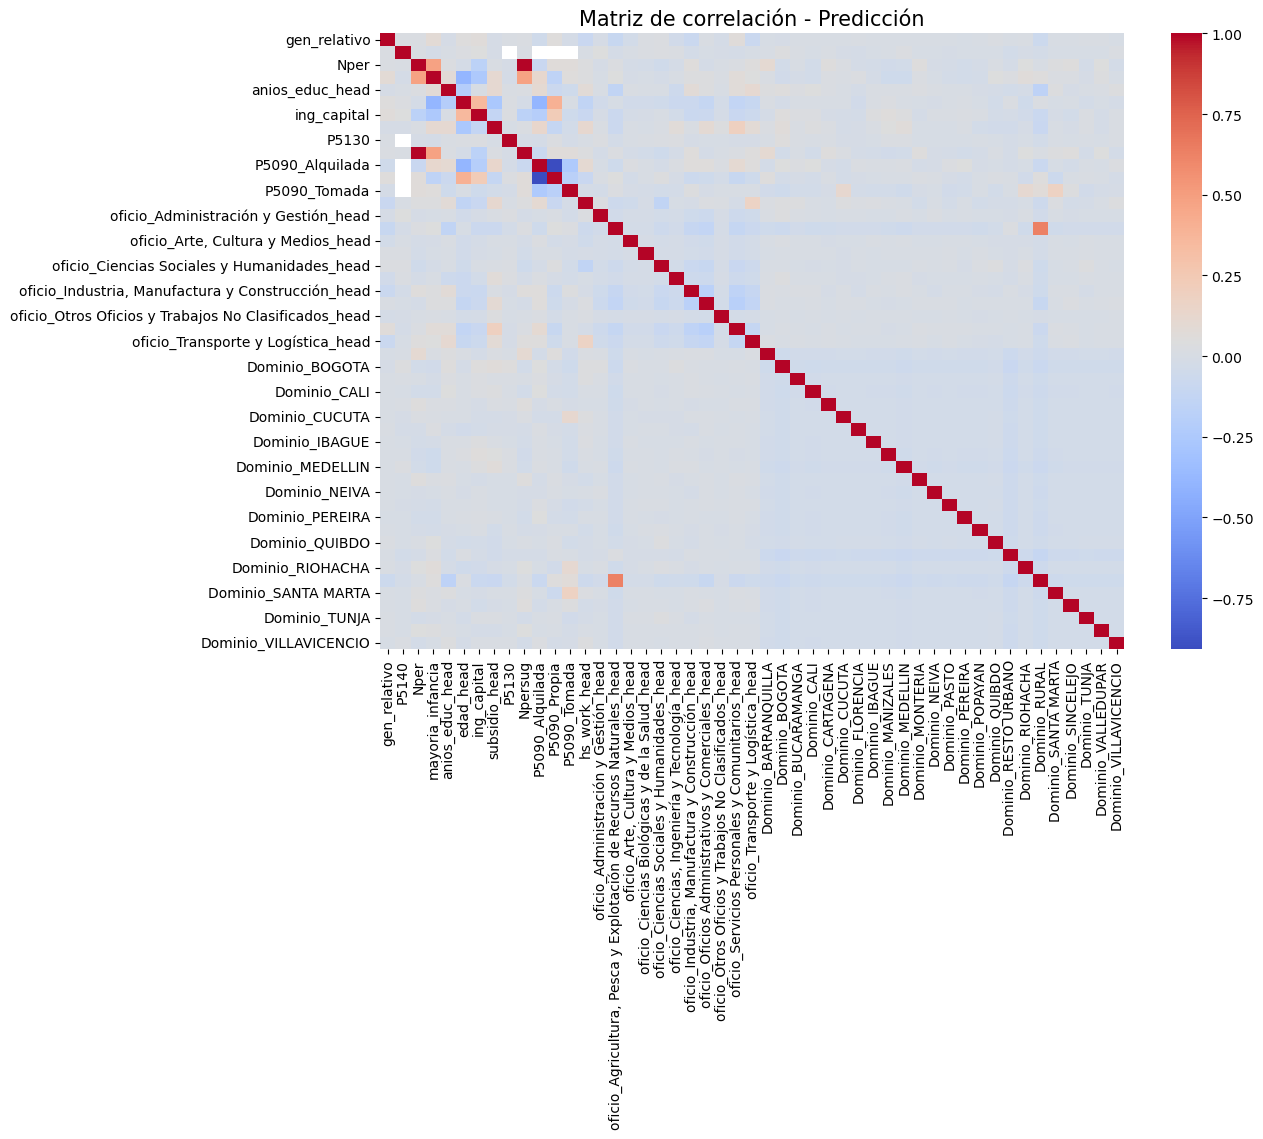

In [31]:
#  matriz de correlación

# predictors = [    'gen_relativo', 'anios_educ_head', 'hacinamiento', 'P5140', 'Nper', 'mayoria_infancia', 'ing_capital', 'P5090_Tomada', 'edad_head', 'subsidio_head']
mat_pred = ['gen_relativo', 'P5140', 'Nper', 'mayoria_infancia',
              'anios_educ_head', 'edad_head', 'ing_capital',
              'subsidio_head', 'P5130', 'Npersug', 'P5090_Alquilada',
       'P5090_Propia', 'P5090_Tomada', 'hs_work_head' ] + dummy_columns_head + list(dominio_dummies.columns)

subset = train_set[mat_pred]

corr = subset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación - Predicción", fontsize=15)
plt.show()


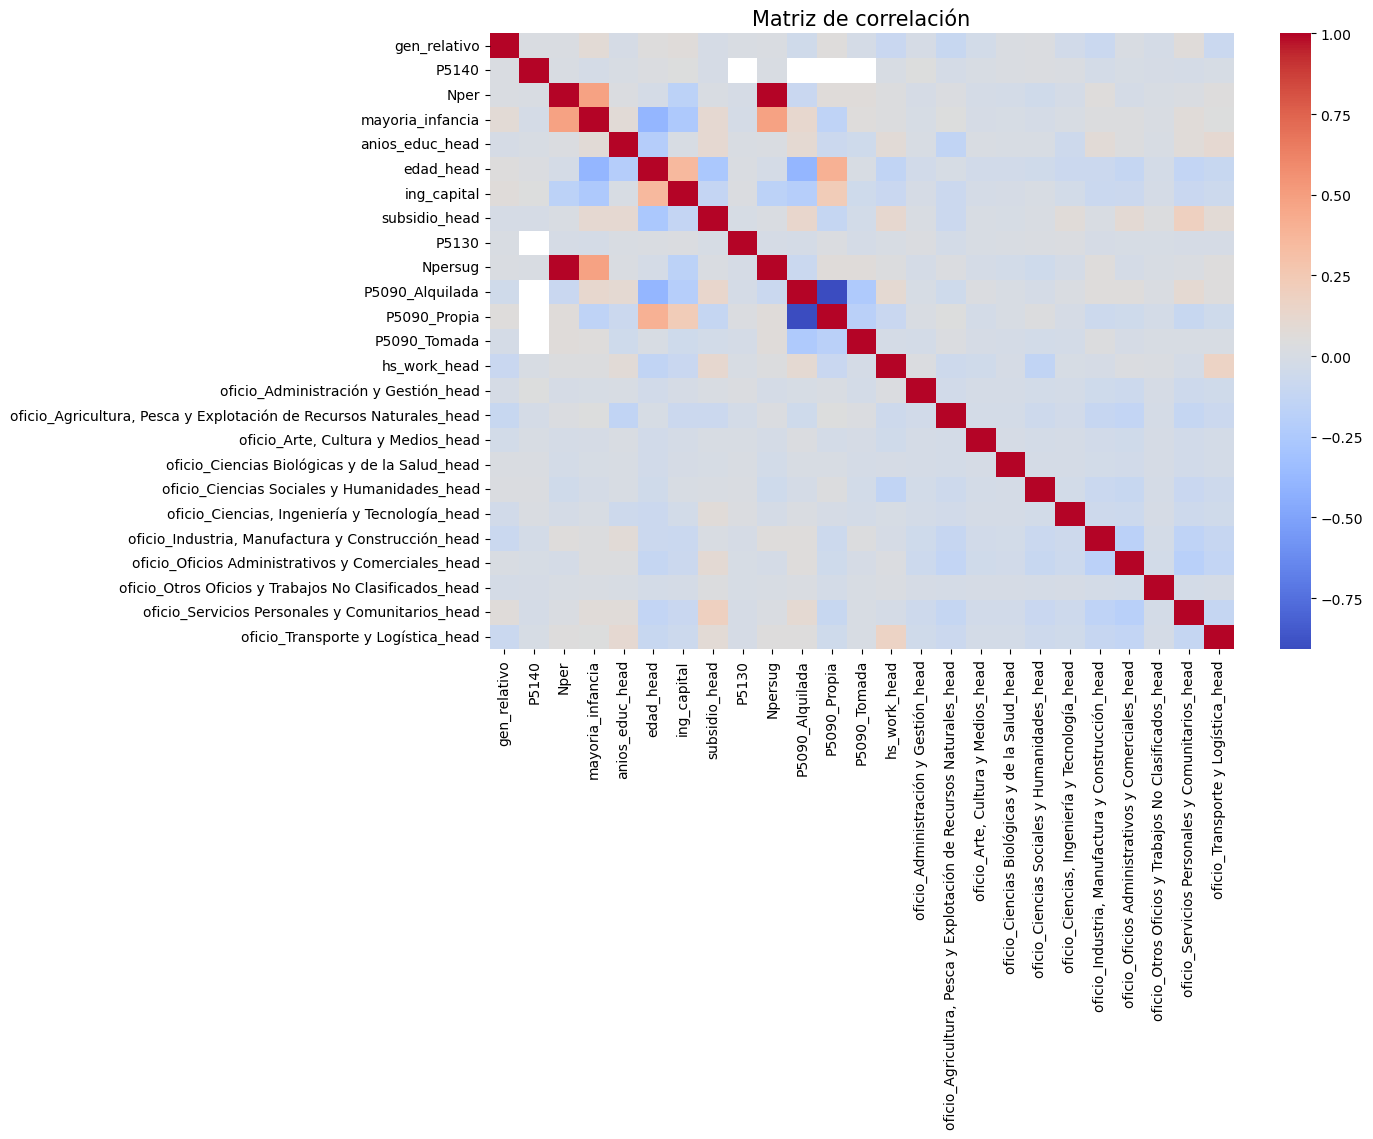

In [ ]:
#  matriz de correlación

# predictors = [    'gen_relativo', 'anios_educ_head', 'hacinamiento', 'P5140', 'Nper', 'mayoria_infancia', 'ing_capital', 'P5090_Tomada', 'edad_head', 'subsidio_head']
mat_class = ['gen_relativo', 'P5140', 'Nper', 'mayoria_infancia',
              'anios_educ_head', 'edad_head', 'ing_capital',
              'subsidio_head', 'P5130', 'Npersug', 'P5090_Alquilada',
       'P5090_Propia', 'P5090_Tomada', 'hs_work_head' ] + dummy_columns_head

subset = train_set[mat_class]

corr = subset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación - Clasificación", fontsize=15)
plt.show()

In [17]:
from sklearn.linear_model import ElasticNetCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

train_set.columns.values


array(['id', 'Ingtot', 'Ingtotob', 'Mujer', 'Varon', 'anios_educ_head',
       'edad_head', 'hs_work_head', 'infancia', 'ing_capital',
       'oficio_Administración y Gestión_head',
       'oficio_Agricultura, Pesca y Explotación de Recursos Naturales_head',
       'oficio_Arte, Cultura y Medios_head',
       'oficio_Ciencias Biológicas y de la Salud_head',
       'oficio_Ciencias Sociales y Humanidades_head',
       'oficio_Ciencias, Ingeniería y Tecnología_head',
       'oficio_Industria, Manufactura y Construcción_head',
       'oficio_Oficios Administrativos y Comerciales_head',
       'oficio_Otros Oficios y Trabajos No Clasificados_head',
       'oficio_Servicios Personales y Comunitarios_head',
       'oficio_Sin Categoría_head', 'oficio_Transporte y Logística_head',
       'subsidio', 'subsidio_head', 'Clase', 'P5000', 'P5010', 'P5100',
       'P5130', 'P5140', 'Nper', 'Npersug', 'Ingtotug', 'Ingtotugarr',
       'Ingpcug', 'Li', 'Lp', 'Pobre', 'Indigente', 'Npobres',
       'N

In [18]:


# Concatenar las dummies al DataFrame train_set
train_set = pd.concat([train_set.drop(columns=['Dominio']), dominio_dummies], axis=1)



In [19]:
predictors = ['gen_relativo', 'P5140', 'Nper', 'mayoria_infancia',
              'anios_educ_head', 'edad_head', 'ing_capital',
              'subsidio_head', 'P5130', 'Npersug', 'P5090_Alquilada',
       'P5090_Propia', 'P5090_Tomada', 'hs_work_head' ] + dummy_columns_head + list(dominio_dummies.columns)


# Seleccionamos (predictoras) e y (variable objetivo)
X = train_set[predictors]
y = train_set['Ingpcug']  # Variable objetivo: ingreso per cápita del hogar


# Imputamos valores faltantes
imputer = SimpleImputer(strategy='median')  
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Escalamos las variables predictoras y lo convertimos en un DataFrame
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


#### Regresión Lineal

In [20]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size=0.2, 
                                                    train_size=0.8, 
                                                    random_state=123)

# Ajustar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = linear_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Coeficientes del modelo
coeficientes = pd.DataFrame({
    "Predictor": predictors,
    "Coeficiente": linear_model.coef_
})

print(coeficientes)

Mean Squared Error: 1061296551682.94
R2 Score: 0.26
                                            Predictor  Coeficiente
0                                        gen_relativo    -32286.52
1                                               P5140     83129.59
2                                                Nper    930070.18
3                                    mayoria_infancia   -129294.22
4                                     anios_educ_head     66757.60
5                                           edad_head      8478.82
6                                         ing_capital    234202.60
7                                       subsidio_head    -22676.54
8                                               P5130     28346.27
9                                             Npersug  -1109623.58
10                                    P5090_Alquilada    159143.59
11                                       P5090_Propia    276234.45
12                                       P5090_Tomada     50681.67
13        

In [21]:
# Dividimos los conjuntos X e Y en entrenamiento y testing.
X_train, X_test, y_train, y_test = train_test_split(
                                        X_scaled,
                                        y,
                                        test_size=0.3,
                                        train_size=0.7,
                                        random_state = 123
                                    )

# Modelo de regresión
# Creamos una lista para almacenar las variables acumuladas
variables_acumuladas = []
resultados = []

# Iteramos sobre las columnas de X_train_df
for x in X_train.columns.values.tolist():
    # Agregamos la nueva variable al conjunto acumulado
    variables_acumuladas.append(x)
    
    # Filtramos las columnas acumuladas en X_train_df
    X_acumulado = X_train[variables_acumuladas]
    
    # Corremos el modelo de regresión
    reg = LinearRegression().fit(X_acumulado, y_train)
    
    # Realizamos un predict con el conjunto de entrenamiento
    y_train_pred = reg.predict(X_acumulado)
    
    # Realizamos una predicción con el conjunto de testing
    y_hat_model = reg.predict(X_test[variables_acumuladas])
    
    # Guardamos los coeficientes, el intercepto y el R^2 del modelo actual
    resultados.append({
        'variables': variables_acumuladas.copy(),
        'coeficientes': reg.coef_.tolist(),
        'intercepto': reg.intercept_,
        'score': reg.score(X_acumulado, y_train),
        'Y predicha': y_hat_model,
        "RMSE_training": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "RMSE_testing": np.sqrt(mean_squared_error(y_test, y_hat_model)),
        "Error": float(np.sqrt(mean_squared_error(y_test, y_hat_model))/np.mean(y_test))
    })

for i in range(2,3):
    # Realizamos una transformación polinómica y corremos la regresión
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train)
    reg =  LinearRegression().fit(X_train_poly,y_train)
    
    # Realizamos un predict con el conjunto de entrenamiento
    y_train_pred = reg.predict(X_train_poly)
    
    # Realizamos una transformación polinómica y luego la predicción con el conjunto de testing
    X_test_poly = poly.fit_transform(X_test[variables_acumuladas])
    y_hat_model = reg.predict(X_test_poly)
    
    # Guardamos los coeficientes, el intercepto y el R^2 del modelo actual
    resultados.append({
        'variables': variables_acumuladas.copy(),
        'coeficientes': reg.coef_.tolist(),
        'intercepto': reg.intercept_,
        'score': reg.score(X_train_poly, y_train),
        'Y predicha': y_hat_model,
        "RMSE_training": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "RMSE_testing": np.sqrt(mean_squared_error(y_test, y_hat_model)),
        "Error": float(np.sqrt(mean_squared_error(y_test, y_hat_model))/np.mean(y_test))
    })

# Mostramos los resultados de cada modelo
for i, modelo in enumerate(resultados, 1):
    print(f"Modelo {i}:")
    print(f"  Variables: {modelo['variables']}")
    print(f"  Coeficientes: {modelo['coeficientes']}")
    print(f"  Intercepto: {modelo['intercepto']}")
    print(f"  R²: {modelo['score']:.4f}")
    print("-" * 10)
    print(f"  RMSE (train): {modelo['RMSE_training']:.2f}")
    print(f"  RMSE (test): {modelo['RMSE_testing']:.2f}")
    print(f"  Error: {modelo['Error']:.2f}")
    print("-" * 40)



Modelo 1:
  Variables: ['gen_relativo']
  Coeficientes: [-18690.259548568592]
  Intercepto: 872056.4954166148
  R²: 0.0002
----------
  RMSE (train): 1233644.94
  RMSE (test): 1268404.89
  Error: 1.46
----------------------------------------
Modelo 2:
  Variables: ['gen_relativo', 'P5140']
  Coeficientes: [-19913.50272738278, 129121.05438173907]
  Intercepto: 872194.1248502742
  R²: 0.0052
----------
  RMSE (train): 1230578.48
  RMSE (test): 1278307.22
  Error: 1.47
----------------------------------------
Modelo 3:
  Variables: ['gen_relativo', 'P5140', 'Nper']
  Coeficientes: [-14352.043236985563, 132578.53434610815, -302585.4653398304]
  Intercepto: 872894.9815722051
  R²: 0.0652
----------
  RMSE (train): 1192907.47
  RMSE (test): 1244375.41
  Error: 1.43
----------------------------------------
Modelo 4:
  Variables: ['gen_relativo', 'P5140', 'Nper', 'mayoria_infancia']
  Coeficientes: [2388.7241998385703, 126506.15389085404, -200069.5030330302, -212991.2256222578]
  Intercepto: 8

In [ ]:
# # ELASTIC NET (NO TERMINA DE CORRER. DEBERIA ALPHA ESTAR ENTRE 0 Y 1?)

# from sklearn.linear_model import ElasticNet
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.preprocessing import StandardScaler
# import numpy as np

# # Selección de predictores y variable objetivo
# X = train_set[predictors]
# y = train_set['Ingpcug']  # Variable objetivo

# # Imputación de valores faltantes
# imputer = SimpleImputer(strategy='median')  
# X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# # Dividir el conjunto de datos en entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# # Estandarización
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Espacio de búsqueda para los hiperparámetros
# params = {
#     'alpha': np.logspace(-5, 5, 100),  # Valores para alpha (regularización)
#     'l1_ratio': np.arange(0, 1, 0.10)  # Valores para l1_ratio
# }

# # Modelo base
# regressor = ElasticNet()

# # RandomizedSearchCV
# rs_cv = RandomizedSearchCV(
#     regressor,
#     params,
#     n_iter=100,  # Número de combinaciones aleatorias a probar
#     scoring='neg_mean_squared_error',  # Métrica de evaluación
#     cv=5,  # Validación cruzada
#     verbose=1,  # Para ver el progreso
#     random_state=42,
#     refit=True,
#     n_jobs=-1  # Paralelizar en todos los núcleos
# )

# # Ajustar el modelo
# rs_cv.fit(X_train, y_train)

# # Predicciones
# y_pred = rs_cv.predict(X_test)

# # Métricas de evaluación
# R2_score = r2_score(y_test, y_pred)
# RMSE_score = np.sqrt(mean_squared_error(y_test, y_pred))

# # Resultados
# print(f"R2 Score: {R2_score:.2f}")
# print(f"RMSE Score: {RMSE_score:.2f}")
# print(f"Mejores Hiperparámetros: {rs_cv.best_params_}")

  

In [22]:
# ESTE SI CORRE 

# Elastic Net
elastic_cv = ElasticNetCV(
    l1_ratio=[0.1, 0.5, 0.7, 0.9, 1.0],  # Valores a probar para L1/L2
    alphas=[0.1, 0.5, 1.0, 5.0, 10.0, 20.0],   # Valores a probar para alpha
    cv=5,                                # Validación cruzada
    random_state=42
)

elastic_cv.fit(X_train, y_train)

c:\Users\bracl\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4851366154702128e+16, tolerance: 13641029233938.092
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\bracl\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 838642023261440.0, tolerance: 13641029233938.092
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\bracl\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 276803460752512.0, tolerance: 13641029233938.092
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\bracl\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py

ElasticNetCV(alphas=[0.1, 0.5, 1.0, 5.0, 10.0, 20.0], cv=5,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 1.0], random_state=42)

In [23]:
# Ver los coeficientes computados
coeficientes = pd.DataFrame({
    'Predictor': X.columns,
    'Coeficiente': elastic_cv.coef_
})
print(coeficientes)

                                            Predictor  Coeficiente
0                                        gen_relativo    -29940.34
1                                               P5140     76927.38
2                                                Nper    918661.49
3                                    mayoria_infancia   -130877.88
4                                     anios_educ_head     67560.13
5                                           edad_head      8719.26
6                                         ing_capital    235725.33
7                                       subsidio_head    -22353.55
8                                               P5130     27139.89
9                                             Npersug  -1096855.57
10                                    P5090_Alquilada    139428.80
11                                       P5090_Propia    255067.85
12                                       P5090_Tomada     42714.66
13                                       hs_work_head     3059

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicciones del modelo
y_pred = elastic_cv.predict(X_test)

# Calcular el Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
error = rmse/np.mean(y_test)
# Calcular el R2
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Coeficiente de error: {error:.2f}")


Root Mean Squared Error: 1105910.85
R² Score: 0.24
Coeficiente de error: 1.28


In [25]:
# ARBOL DE DECISIÓN - REGRESION

from sklearn.model_selection import RandomizedSearchCV 
from sklearn.tree import DecisionTreeRegressor

# Definir el modelo base
dt = DecisionTreeRegressor(random_state=42)

# Definir el grid de hiperparámetros para optimización
param_grid = {
    'criterion': ['squared_error', 'absolute_error'],  # Clave: Valores en lista
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt']
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_grid,
    n_iter=10,  # Probar 10 combinaciones aleatorias
    cv=3,       # Validación cruzada con 3 particiones
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=2,
    scoring='neg_mean_squared_error',
    random_state=42
)

X_train_subset = X_train[predictors]
X_test_subset = X_test[predictors]

# Entrenar el modelo
random_search.fit(X_train_subset, y_train)

# Obtener el mejor modelo
best_dt_sub = random_search.best_estimator_
print(f"Mejores hiperparámetros: {random_search.best_params_}")

# Evaluar el modelo en el conjunto de prueba
y_pred = best_dt_sub.predict(X_test_subset)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse_subset = np.sqrt(mse)
r2_subset = r2_score(y_test, y_pred)

print(f"\nMétricas de evaluación:")
print(f"Root Mean Squared Error (MSE): {rmse_subset:.2f}")
print(f"R^2 Score: {r2_subset:.2f}")


# # Entrenar el modelo completo
random_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_dt = random_search.best_estimator_
print(f"Mejores hiperparámetros: {random_search.best_params_}")

# Evaluar el modelo en el conjunto de prueba
y_pred = best_dt.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nMétricas de evaluación:")
print(f"Root Mean Squared Error (MSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejores hiperparámetros: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'squared_error'}

Métricas de evaluación:
Root Mean Squared Error (MSE): 1049159.09
R^2 Score: 0.32
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejores hiperparámetros: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'squared_error'}

Métricas de evaluación:
Root Mean Squared Error (MSE): 1049159.09
R^2 Score: 0.32


In [26]:
# Obtener la importancia de los predictores del subconjunto
importances = best_dt_sub.feature_importances_
predictores = X_train_subset.columns

# Crear un DataFrame para visualizar las importancias
importancia_predictores = pd.DataFrame({
    'Predictor': predictores,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

# Mostrar la tabla de importancias
print("\nImportancia de los predictores del subconjunto:")
print(importancia_predictores)


# Obtener la importancia de los predictores completo
importances = best_dt.feature_importances_
predictores = X.columns

# Crear un DataFrame para visualizar las importancias
importancia_predictores = pd.DataFrame({
    'Predictor': predictores,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

# Mostrar la tabla de importancias
print("\nImportancia de los predictores:")
print(importancia_predictores)





Importancia de los predictores del subconjunto:
                                            Predictor  Importancia
8                                               P5130         0.29
9                                             Npersug         0.14
18        oficio_Ciencias Sociales y Humanidades_head         0.13
1                                               P5140         0.10
14               oficio_Administración y Gestión_head         0.05
2                                                Nper         0.05
4                                     anios_educ_head         0.04
10                                    P5090_Alquilada         0.03
3                                    mayoria_infancia         0.03
17      oficio_Ciencias Biológicas y de la Salud_head         0.02
5                                           edad_head         0.02
6                                         ing_capital         0.02
26                                     Dominio_BOGOTA         0.01
19      ofici

In [ ]:
# # Ordenar por importancia
# sorted_data = sorted(zip(importancia_predictores['Importancia'], importancia_predictores['Predictor']), reverse=True)
# importances, predictores = zip(*sorted_data)


# # Crear el bar plot horizontal
# plt.figure(figsize=(10, 6))
# plt.barh(predictores, importances, color='skyblue', edgecolor='black')

# # Configuración visual
# plt.xlabel('Importancia (en %)', fontsize=14)
# plt.ylabel('Predictores', fontsize=14)
# plt.title('Importancia de los Predictores', fontsize=16)
# plt.gca().invert_yaxis()  # Invertir para mostrar el predictor más importante arriba
# plt.grid(axis='x', linestyle='--', alpha=0.7)

# plt.show()

In [ ]:
# Visualización del árbol 
# from sklearn.tree import plot_tree
# plt.figure(figsize=(20, 10))
# plot_tree(best_dt, 
        #   filled=True, 
        #   feature_names=X.columns, 
        #   fontsize=10, 
        #   rounded=True, 
        #   precision=2, 
        #   proportion=True, 
        #   impurity=False)
# plt.title("Decision Tree Visualization", fontsize=16)
# plt.show()


In [81]:
# ARBOL DE DECISIÓN - CLASIFICACIÓN

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

y2 = train_set['Pobre']




# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y2,
                                                    test_size=0.2, 
                                                    train_size=0.8, 
                                                    random_state=123)

X_train_subset = X_train[columnas_subset]
X_test_subset = X_test[columnas_subset]


# Definir el modelo base
dt = DecisionTreeClassifier(random_state=42)

# Definir el grid de hiperparámetros para optimización
param_grid = {
    'criterion': ['gini', 'entropy'],  # Clave: Valores en lista
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt']
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_grid,
    n_iter=10,  # Probar 10 combinaciones aleatorias
    cv=3,       # Validación cruzada con 3 particiones
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=2,
    scoring='neg_mean_squared_error',
    random_state=42
)

# Entrenar el modelo
random_search.fit(X_train_subset, y_train)

# Obtener el mejor modelo
best_dt_sub = random_search.best_estimator_
print(f"Mejores hiperparámetros: {random_search.best_params_}")

# Evaluar el modelo en el conjunto de prueba
y_pred_sub = best_dt_sub.predict(X_test_subset)

# Mostrar métricas de evaluación
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_sub))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_sub))

# # Entrenar el modelo completo
random_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_dt = random_search.best_estimator_
print(f"Mejores hiperparámetros: {random_search.best_params_}")

# Evaluar el modelo en el conjunto de prueba
y_pred = best_dt.predict(X_test)

# Mostrar métricas de evaluación
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))







Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejores hiperparámetros: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'}
Matriz de confusión:
[[25426  1008]
 [ 4755  1803]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90     26434
           1       0.64      0.27      0.38      6558

    accuracy                           0.83     32992
   macro avg       0.74      0.62      0.64     32992
weighted avg       0.80      0.83      0.80     32992

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejores hiperparámetros: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10, 'criterion': 'entropy'}
Matriz de confusión:
[[25422  1012]
 [ 4598  1960]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     26434
           1 

In [77]:
# Obtener la importancia de los predictores del subconjunto
importances = best_dt_sub.feature_importances_
predictores = X_train_subset.columns

# Crear un DataFrame para visualizar las importancias
importancia_predictores = pd.DataFrame({
    'Predictor': predictores,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

# Mostrar la tabla de importancias
print("\nImportancia de los predictores del subconjunto:")
print(importancia_predictores)


# Obtener la importancia de los predictores completo
importances = best_dt.feature_importances_
predictores = X.columns

# Crear un DataFrame para visualizar las importancias
importancia_predictores = pd.DataFrame({
    'Predictor': predictores,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

# Mostrar la tabla de importancias
print("\nImportancia de los predictores:")
print(importancia_predictores)



Importancia de los predictores del subconjunto:
          Predictor  Importancia
4  mayoria_infancia         0.44
1      hacinamiento         0.19
2             P5140         0.15
5       ing_capital         0.10
3              Nper         0.08
0      gen_relativo         0.04

Importancia de los predictores:
          Predictor  Importancia
4  mayoria_infancia         0.35
1      hacinamiento         0.20
9     subsidio_head         0.13
2             P5140         0.11
5   anios_educ_head         0.06
8       ing_capital         0.04
7      hs_work_head         0.04
6         edad_head         0.03
3              Nper         0.03
0      gen_relativo         0.01


In [ ]:
# # Ordenar por importancia
# sorted_data = sorted(zip(importancia_predictores['Importancia'], importancia_predictores['Predictor']), reverse=True)
# importances, predictores = zip(*sorted_data)


# # Crear el bar plot horizontal
# plt.figure(figsize=(10, 6))
# plt.barh(predictores, importances, color='skyblue', edgecolor='black')

# # Configuración visual
# plt.xlabel('Importancia (en %)', fontsize=14)
# plt.ylabel('Predictores', fontsize=14)
# plt.title('Importancia de los Predictores', fontsize=16)
# plt.gca().invert_yaxis()  # Invertir para mostrar el predictor más importante arriba
# plt.grid(axis='x', linestyle='--', alpha=0.7)

# plt.show()

<Figure size 1000x600 with 0 Axes>

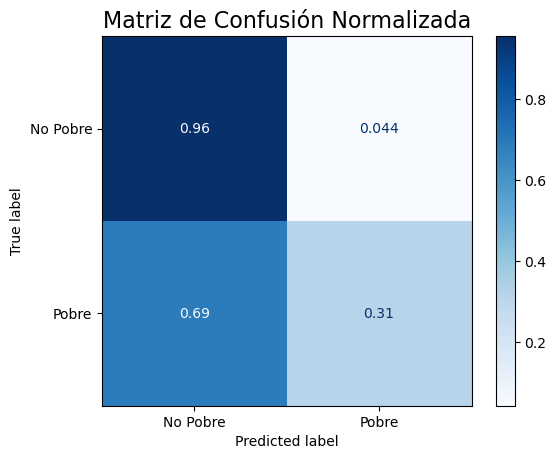

In [78]:
# Matriz de confusión
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(10, 6))
disp = ConfusionMatrixDisplay.from_estimator(best_dt, X_test, y_test, cmap='Blues', normalize='true', display_labels=['No Pobre', 'Pobre'])
plt.title("Matriz de Confusión Normalizada", fontsize=16)
plt.show()


In [ ]:
# RANDOM FOREST - CLASIFICACIÓN

In [79]:
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo base
rf = RandomForestClassifier(random_state=42)

# Definir el grid de hiperparámetros para optimización
param_grid = {
    'criterion': ['gini', 'entropy'],  # Clave: Valores en lista
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt']
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=10,  # Probar 10 combinaciones aleatorias
    cv=3,       # Validación cruzada con 3 particiones
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=2,
    scoring='neg_mean_squared_error',
    random_state=42
)

# Entrenar el modelo
random_search.fit(X_train_subset, y_train)

# Obtener el mejor modelo
best_rf_sub = random_search.best_estimator_
print(f"Mejores hiperparámetros: {random_search.best_params_}")

# Evaluar el modelo en el conjunto de prueba
y_pred_sub = best_rf_sub.predict(X_test_subset)

# Mostrar métricas de evaluación
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_sub))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_sub))

# # Entrenar el modelo completo
random_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_rf = random_search.best_estimator_
print(f"Mejores hiperparámetros: {random_search.best_params_}")

# Evaluar el modelo en el conjunto de prueba
y_pred = best_rf.predict(X_test)

# Mostrar métricas de evaluación
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejores hiperparámetros: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'}
Matriz de confusión:
[[24599   894]
 [ 4637  1618]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90     25493
           1       0.64      0.26      0.37      6255

    accuracy                           0.83     31748
   macro avg       0.74      0.61      0.63     31748
weighted avg       0.80      0.83      0.79     31748

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejores hiperparámetros: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'}
Matriz de confusión:
[[24668   825]
 [ 4489  1766]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.97      0.90     25493
           

In [56]:
# Obtener la importancia de los predictores del subconjunto
importances = best_rf_sub.feature_importances_
predictores = X_train_subset.columns

# Crear un DataFrame para visualizar las importancias
importancia_predictores = pd.DataFrame({
    'Predictor': predictores,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

# Mostrar la tabla de importancias
print("\nImportancia de los predictores del subconjunto:")
print(importancia_predictores)


# Obtener la importancia de los predictores completo
importances = best_rf.feature_importances_
predictores = X.columns

# Crear un DataFrame para visualizar las importancias
importancia_predictores = pd.DataFrame({
    'Predictor': predictores,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

# Mostrar la tabla de importancias
print("\nImportancia de los predictores:")
print(importancia_predictores)



Importancia de los predictores del subconjunto:
          Predictor  Importancia
4  mayoria_infancia         0.29
1      hacinamiento         0.17
5      hacinamiento         0.17
2             P5140         0.15
6       ing_capital         0.12
3              Nper         0.07
0      gen_relativo         0.03

Importancia de los predictores:
          Predictor  Importancia
4  mayoria_infancia         0.32
1      hacinamiento         0.15
9     subsidio_head         0.14
2             P5140         0.10
8       ing_capital         0.10
5   anios_educ_head         0.06
7      hs_work_head         0.04
6         edad_head         0.04
3              Nper         0.04
0      gen_relativo         0.02


In [ ]:
# # Ordenar por importancia
# sorted_data = sorted(zip(importancia_predictores['Importancia'], importancia_predictores['Predictor']), reverse=True)
# importances, predictores = zip(*sorted_data)


# # Crear el bar plot horizontal
# plt.figure(figsize=(10, 6))
# plt.barh(predictores, importances, color='skyblue', edgecolor='black')

# # Configuración visual
# plt.xlabel('Importancia (en %)', fontsize=14)
# plt.ylabel('Predictores', fontsize=14)
# plt.title('Importancia de los Predictores', fontsize=16)
# plt.gca().invert_yaxis()  # Invertir para mostrar el predictor más importante arriba
# plt.grid(axis='x', linestyle='--', alpha=0.7)

# plt.show()

<Figure size 1000x600 with 0 Axes>

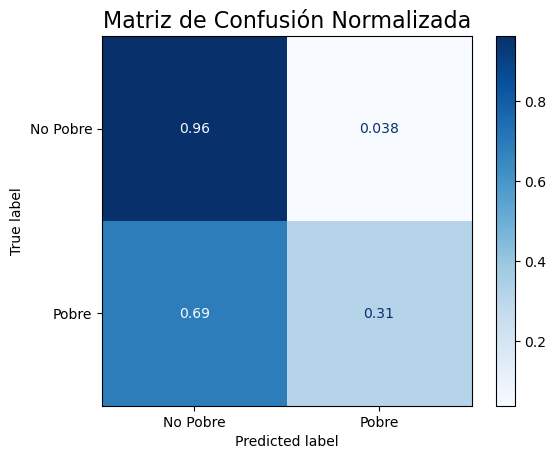

In [57]:
# Matriz de confusión

plt.figure(figsize=(10, 6))
disp = ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, cmap='Blues', normalize='true', display_labels=['No Pobre', 'Pobre'])
plt.title("Matriz de Confusión Normalizada", fontsize=16)
plt.show()


In [ ]:
# LOGIT - CLASIFICACIÓN

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

y_test = y_test.loc[X_test.index]

lr = LogisticRegression(random_state=42, max_iter=1500)
lr.fit(X_train_subset, y_train)

y_pred_sub = lr.predict(X_test_subset)

# Evaluación
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_sub))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_sub))

lr = LogisticRegression(random_state=42, max_iter=1500)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# Evaluación
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[25851   583]
 [ 5265  1293]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     26434
           1       0.69      0.20      0.31      6558

    accuracy                           0.82     32992
   macro avg       0.76      0.59      0.60     32992
weighted avg       0.80      0.82      0.78     32992

Matriz de confusión:
[[25419  1015]
 [ 4634  1924]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     26434
           1       0.65      0.29      0.41      6558

    accuracy                           0.83     32992
   macro avg       0.75      0.63      0.65     32992
weighted avg       0.81      0.83      0.80     32992



<Figure size 1000x600 with 0 Axes>

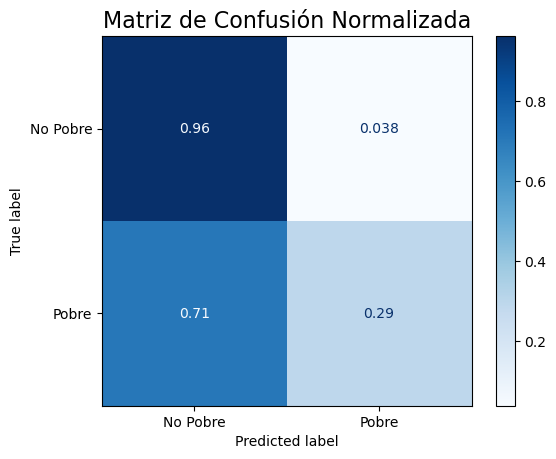

In [62]:
# Matriz de confusión
plt.figure(figsize=(10, 6))
disp = ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, cmap='Blues', normalize='true', display_labels=['No Pobre', 'Pobre'])
plt.title("Matriz de Confusión Normalizada", fontsize=16)
plt.show()


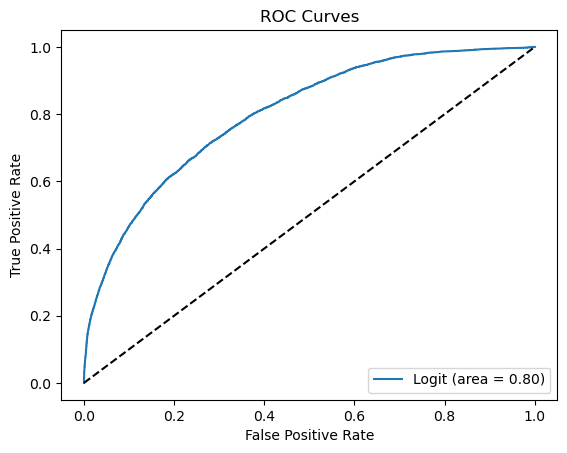

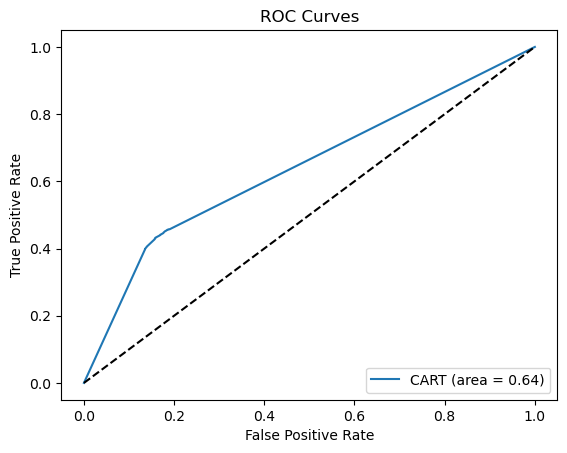

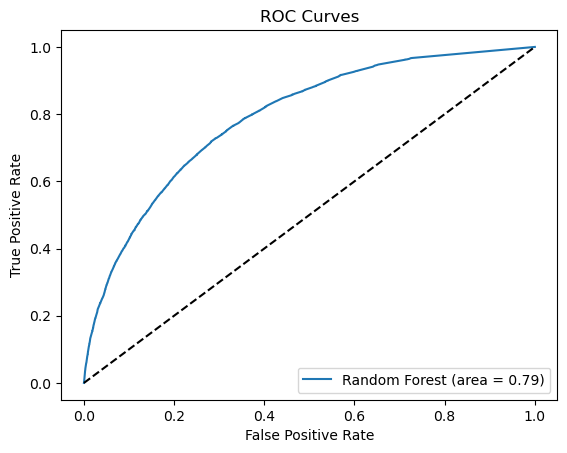

In [86]:
## Aca deberiamos poner los modelos. 
from sklearn.metrics import roc_curve, auc


models = {
    'Logit': lr,
    'CART': dt,
    'Random Forest': rf
}

auc_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    auc_scores[name] = roc_auc

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc='lower right')
    plt.show()